<a href="https://colab.research.google.com/github/Raexann/Models/blob/main/Malaria_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/cell_images.zip (Unzipped Files)-20230611T163216Z-001.zip" -d '/content/output/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145410_cell_3.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145410_cell_57.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145410_cell_32.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145410_cell_47.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145302_cell_89.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C131P92ThinF_IMG_20151004_145302_cell_29.png  
  inflating: /content/output/cell_images.zip (Unzipped Files)/cell_images/Uninfected/C130P91ThinF_IMG_20151004_141428_cell_67.png  
  inflating: /content/outp

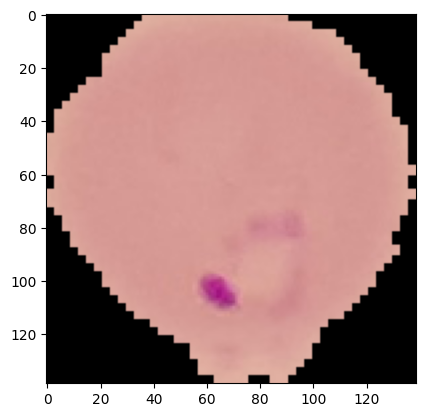

In [ ]:
import matplotlib.pyplot as plt
im=plt.imread('/content/output/cell_images.zip (Unzipped Files)/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png')
plt.imshow(im)
plt.show()

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#split with a ratio
#to only split into training and validation set, set a tuple ratio (.8,.2)
import splitfolders
splitfolders.ratio("/content/output/cell_images.zip (Unzipped Files)/cell_images",output="output",seed=1337,ratio=(.8,.2))

Copying files: 11418 files [00:02, 4849.39 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#all images will be rescaled by 1./255
train_data=ImageDataGenerator(
    rescale=1./255,#normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_data=ImageDataGenerator(rescale=1./255)
train_generator=train_data.flow_from_directory(
    "/content/output/train",
    target_size=(150,150),# all images will be resized to 150x150
    batch_size=20,
    class_mode='binary')
validation_generator=test_data.flow_from_directory(
    "/content/output/val",
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 9134 images belonging to 2 classes.
Found 2284 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
img_input=layers.Input(shape=(150,150,3))
x=layers.Conv2D(16,3,activation='relu')(img_input)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(32,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Flatten()(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model=Model(img_input,output)

In [ ]:
from tensorflow .keras .preprocessing.image import img_to_array
from tensorflow.keras.optimizers.legacy import Adadelta

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer=Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0),
metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100, #2000 images=batch_size*steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50, #1000 images = batch_size*steps
    verbose=2)

<ipython-input-11-9f4ecc2076d6>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/15
100/100 - 72s - loss: 0.5480 - acc: 0.7798 - val_loss: 0.5241 - val_acc: 0.7930 - 72s/epoch - 723ms/step
Epoch 2/15
100/100 - 70s - loss: 0.5280 - acc: 0.7820 - val_loss: 0.5243 - val_acc: 0.7840 - 70s/epoch - 698ms/step
Epoch 3/15
100/100 - 71s - loss: 0.5296 - acc: 0.7790 - val_loss: 0.5170 - val_acc: 0.7830 - 71s/epoch - 706ms/step
Epoch 4/15
100/100 - 70s - loss: 0.5216 - acc: 0.7860 - val_loss: 0.5063 - val_acc: 0.7750 - 70s/epoch - 703ms/step
Epoch 5/15
100/100 - 71s - loss: 0.5086 - acc: 0.7760 - val_loss: 0.4298 - val_acc: 0.8100 - 71s/epoch - 712ms/step
Epoch 6/15
100/100 - 72s - loss: 0.4112 - acc: 0.8315 - val_loss: 0.2439 - val_acc: 0.8890 - 72s/epoch - 719ms/step
Epoch 7/15
100/100 - 70s - loss: 0.2440 - acc: 0.9288 - val_loss: 0.1748 - val_acc: 0.9520 - 70s/epoch - 700ms/step
Epoch 8/15
100/100 - 70s - loss: 0.2442 - acc: 0.9325 - val_loss: 0.1561 - val_acc: 0.9650 - 70s/epoch - 700ms/step
Epoch 9/15
100/100 - 70s - loss: 0.1982 - acc: 0.9380 - val_loss: 0.2195